## Sentiment Analysis for Twiter Users Tweets
1. Loading Dataset
2. Preprocessing by removing character and special character and convert Labels from postive and Negative to 1 and 0
3. Embeding words Process
4. Model Training By Lstm
5. Evalution
6. Testing Example

In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
# Load dataset
data_path = 'twitter_training.csv'
df = pd.read_csv(data_path, header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])

In [3]:
df.shape

(74682, 4)

In [4]:
df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Preprocessing

In [5]:
# Drop unnecessary columns
df = df[['Sentiment', 'Tweet']]

# Check for null values
df.dropna(inplace=True)

# Convert sentiment labels to binary (1: Positive, 0: Negative)
df = df[df['Sentiment'].isin(['Positive', 'Negative'])]
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

df['Tweet'] = df['Tweet'].apply(clean_text)

In [6]:
df.isnull().values.any()

np.False_

In [7]:
df.shape

(43013, 2)

In [8]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'], test_size=0.2, random_state=42)

## Embedding Layer

In [9]:
# Tokenization and padding
vocab_size = 10000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

## Training the Model RNN

In [10]:
# Build RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

c:\Users\Abu ElZozz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5, batch_size=32)

Epoch 1/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 73s 68ms/step - accuracy: 0.5696 - loss: 0.6821 - val_accuracy: 0.5445 - val_loss: 0.6817
Epoch 2/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 71s 66ms/step - accuracy: 0.5679 - loss: 0.6814 - val_accuracy: 0.5718 - val_loss: 0.6798
Epoch 3/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 70s 65ms/step - accuracy: 0.5669 - loss: 0.6815 - val_accuracy: 0.5732 - val_loss: 0.6796
Epoch 4/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 68s 63ms/step - accuracy: 0.5698 - loss: 0.6826 - val_accuracy: 0.5738 - val_loss: 0.6795
Epoch 5/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 68s 63ms/step - accuracy: 0.5709 - loss: 0.6809 - val_accuracy: 0.5772 - val_loss: 0.6785


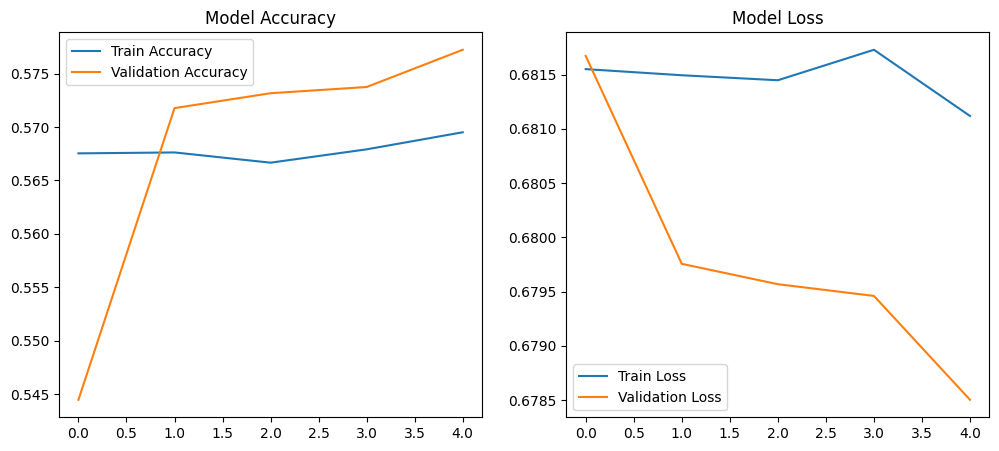

In [24]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [25]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5722 - loss: 0.6792
Accuracy: 57.72%


## Testing

In [29]:
# Test predictions
sample_tweets = ["I love this product!", "no one like that"]
sample_seq = tokenizer.texts_to_sequences(sample_tweets)
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')
predictions = model.predict(sample_pad)
for tweet, pred in zip(sample_tweets, predictions):
    sentiment = 'Positive' if pred > 0.5 else 'Negative'
    print(f'Tweet: {tweet} | Sentiment: {sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Tweet: I love this product! | Sentiment: Positive
Tweet: no one like that | Sentiment: Negative
